In [1]:
%pip install matplotlib
%pip install seaborn
%pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

import seaborn as sns

import scipy
import pylab

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("../data/merged-data.csv")
names = pd.read_csv("../data/genes-to-get.csv")

In [4]:
df.head()

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth
0,k119_38397_2,SRR5650060,NP_417533.1,UC,8599308,900.0,81.0,5.0,76.0,900.0,8.34
1,k119_60203_75,SRR6468687,AAL19701.1,nonIBD,48956407,846.0,414.0,36.0,378.0,846.0,45.05
2,k119_155032_2,SRR6468687,AAL19701.1,nonIBD,48956407,843.0,104.0,24.0,80.0,843.0,10.41
3,NaN,SRR1212289,AAL19700.1,CD,1685562,0.0,0.0,0.0,0.0,0.0,0.00
4,k119_50313_4,SRR2145382,NP_417533.1,nonIBD,6515322,900.0,146.0,42.0,104.0,900.0,13.82


In [5]:
names.head()

,symbol,gene_id,organism,gene_name,NCBI_DB,gene_full_name
0,NP_462264.1,STM3354,Salmonella,ttdA,protein,L(+)-tartrate dehydratase subunit beta
1,NP_462265.1,STM3355,Salmonella,ttdB,protein,tartrate dehydratase subunit alpha subunit
2,NP_459741.1,STM0761,Salmonella,dtuB,protein,Tartrate dehydratase beta subunit/Fumarate hyd...
3,NP_459742.1,STM0762,Salmonella,dtuA,protein,"fumarate hydratase, alpha subunit"
4,AAL19700.1,NaN,Salmonella,NaN,protein,Tartrate dehydratase beta subunit/Fumarate hyd...


In [6]:
df = df.merge(names[['symbol', 'organism', 'gene_full_name']], left_on='gene', right_on='symbol', how='left')
df['name'] = df[['symbol', 'organism', 'gene_full_name']].agg('-'.join, axis=1)

In [7]:
df.head()

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name
0,k119_38397_2,SRR5650060,NP_417533.1,UC,8599308,900.0,81.0,5.0,76.0,900.0,8.34,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...
1,k119_60203_75,SRR6468687,AAL19701.1,nonIBD,48956407,846.0,414.0,36.0,378.0,846.0,45.05,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph..."
2,k119_155032_2,SRR6468687,AAL19701.1,nonIBD,48956407,843.0,104.0,24.0,80.0,843.0,10.41,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph..."
3,NaN,SRR1212289,AAL19700.1,CD,1685562,0.0,0.0,0.0,0.0,0.0,0.00,AAL19700.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,AAL19700.1-Salmonella-Tartrate dehydratase bet...
4,k119_50313_4,SRR2145382,NP_417533.1,nonIBD,6515322,900.0,146.0,42.0,104.0,900.0,13.82,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...


In [8]:
# Create a sum of mapped reads for each gene for each sample
# The mapped reads should be normalized by total reads in a sample as well as the length of the contig

df_simple = df.copy()

df_simple['diagnosis'] = df_simple['diagnosis'].str.lower().replace({'cd': 'IBD', 'uc': 'IBD', 'nonibd': 'Control'})

df_simple['mapped_norm_by_read_count'] = df_simple['mapped']/df_simple['read_count'] * 1000000

df_simple['mapped_norm_by_contig_length'] = 0.0
df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_contig_length'] = (
    (df_simple.loc[df_simple['length'] > 0, 'mapped'] / df_simple.loc[df_simple['length'] > 0, 'length']) * 1000
)

df_simple['mapped_norm_by_read_count_and_contig_length'] = 0.0
df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_read_count_and_contig_length'] = (
    (df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_read_count'] / df_simple.loc[df_simple['length'] > 0, 'length']) * 1000
)


df_filter = df[df['contig'].notna()]
df_simple_filter = df_simple[df_simple['contig'].notna()]

In [9]:
print('There are a minimum of 9 rows per sample')
df_simple.sort_values(['run', "gene"]).head(n=20)

There are a minimum of 9 rows per sample


,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name,mapped_norm_by_read_count,mapped_norm_by_contig_length,mapped_norm_by_read_count_and_contig_length
1938,NaN,ERR011087,AAA60327.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,0.0,0.0,0.0
8111,NaN,ERR011087,AAL19700.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,AAL19700.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,AAL19700.1-Salmonella-Tartrate dehydratase bet...,0.0,0.0,0.0
4087,NaN,ERR011087,AAL19701.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph...",0.0,0.0,0.0
9623,NaN,ERR011087,NP_417533.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,0.0,0.0,0.0
11623,NaN,ERR011087,NP_417534.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,NP_417534.1,Escherichia,L(+)-tartrate dehydratase subunit beta,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,0.0,0.0,0.0
5833,NaN,ERR011087,NP_459741.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,NP_459741.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,NP_459741.1-Salmonella-Tartrate dehydratase be...,0.0,0.0,0.0
9746,NaN,ERR011087,NP_459742.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,NP_459742.1,Salmonella,"fumarate hydratase, alpha subunit","NP_459742.1-Salmonella-fumarate hydratase, alp...",0.0,0.0,0.0
311,NaN,ERR011087,NP_462264.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,NP_462264.1,Salmonella,L(+)-tartrate dehydratase subunit beta,NP_462264.1-Salmonella-L(+)-tartrate dehydrata...,0.0,0.0,0.0
10908,NaN,ERR011087,NP_462265.1,Control,11640976,0.0,0.0,0.0,0.0,0.0,0.0,NP_462265.1,Salmonella,tartrate dehydratase subunit alpha subunit,NP_462265.1-Salmonella-tartrate dehydratase su...,0.0,0.0,0.0
10188,NaN,ERR011088,AAA60327.1,Control,10868175,0.0,0.0,0.0,0.0,0.0,0.0,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,0.0,0.0,0.0


In [10]:
print("But a sample may contain any number of contigs for a gene.\nI.e. a sample has a minimum of 9 rows but no maximum.")
df_simple.sort_values(['run', "gene"]).tail(n=20)

But a sample may contain any number of contigs for a gene.
I.e. a sample has a minimum of 9 rows but no maximum.


,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name,mapped_norm_by_read_count,mapped_norm_by_contig_length,mapped_norm_by_read_count_and_contig_length
776,NaN,SRR6468717,NP_417534.1,IBD,5986216,0.0,0.0,0.0,0.0,0.0,0.00,NP_417534.1,Escherichia,L(+)-tartrate dehydratase subunit beta,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,0.000000,0.000000,0.000000
6629,k119_18375_2,SRR6468717,NP_459741.1,IBD,5986216,552.0,36.0,4.0,32.0,552.0,6.03,NP_459741.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,NP_459741.1-Salmonella-Tartrate dehydratase be...,6.013816,65.217391,10.894594
2720,k119_23443_6,SRR6468717,NP_459742.1,IBD,5986216,843.0,177.0,41.0,136.0,843.0,18.69,NP_459742.1,Salmonella,"fumarate hydratase, alpha subunit","NP_459742.1-Salmonella-fumarate hydratase, alp...",29.567927,209.964413,35.074647
10637,NaN,SRR6468717,NP_462264.1,IBD,5986216,0.0,0.0,0.0,0.0,0.0,0.00,NP_462264.1,Salmonella,L(+)-tartrate dehydratase subunit beta,NP_462264.1-Salmonella-L(+)-tartrate dehydrata...,0.000000,0.000000,0.000000
21,NaN,SRR6468717,NP_462265.1,IBD,5986216,0.0,0.0,0.0,0.0,0.0,0.00,NP_462265.1,Salmonella,tartrate dehydratase subunit alpha subunit,NP_462265.1-Salmonella-tartrate dehydratase su...,0.000000,0.000000,0.000000
10056,k119_8049_5,SRR6468718,AAA60327.1,IBD,10773619,1032.0,94.0,8.0,86.0,1032.0,8.51,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,8.725016,91.085271,8.454473
10057,k119_42053_20,SRR6468718,AAA60327.1,IBD,10773619,1041.0,253.0,27.0,226.0,1041.0,21.74,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,23.483288,243.035543,22.558394
10058,k119_14515_86,SRR6468718,AAA60327.1,IBD,10773619,1041.0,366.0,56.0,310.0,1041.0,30.53,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,33.971871,351.585014,32.633882
10059,k119_59930_2,SRR6468718,AAA60327.1,IBD,10773619,1050.0,115.0,11.0,104.0,1050.0,9.84,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,10.674222,109.523810,10.165926
10060,k119_10184_9,SRR6468718,AAA60327.1,IBD,10773619,1032.0,304.0,32.0,272.0,1032.0,26.69,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,28.217074,294.573643,27.342126


In [11]:
df_simple['Total'] = df_simple.groupby(['run', 'gene'])['mapped_norm_by_read_count_and_contig_length'].transform('sum')
df_simple.sort_values(['run', "gene"]).tail(n=20)

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name,mapped_norm_by_read_count,mapped_norm_by_contig_length,mapped_norm_by_read_count_and_contig_length,Total
776,NaN,SRR6468717,NP_417534.1,IBD,5986216,0.0,0.0,0.0,0.0,0.0,0.00,NP_417534.1,Escherichia,L(+)-tartrate dehydratase subunit beta,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,0.000000,0.000000,0.000000,0.000000
6629,k119_18375_2,SRR6468717,NP_459741.1,IBD,5986216,552.0,36.0,4.0,32.0,552.0,6.03,NP_459741.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,NP_459741.1-Salmonella-Tartrate dehydratase be...,6.013816,65.217391,10.894594,10.894594
2720,k119_23443_6,SRR6468717,NP_459742.1,IBD,5986216,843.0,177.0,41.0,136.0,843.0,18.69,NP_459742.1,Salmonella,"fumarate hydratase, alpha subunit","NP_459742.1-Salmonella-fumarate hydratase, alp...",29.567927,209.964413,35.074647,35.074647
10637,NaN,SRR6468717,NP_462264.1,IBD,5986216,0.0,0.0,0.0,0.0,0.0,0.00,NP_462264.1,Salmonella,L(+)-tartrate dehydratase subunit beta,NP_462264.1-Salmonella-L(+)-tartrate dehydrata...,0.000000,0.000000,0.000000,0.000000
21,NaN,SRR6468717,NP_462265.1,IBD,5986216,0.0,0.0,0.0,0.0,0.0,0.00,NP_462265.1,Salmonella,tartrate dehydratase subunit alpha subunit,NP_462265.1-Salmonella-tartrate dehydratase su...,0.000000,0.000000,0.000000,0.000000
10056,k119_8049_5,SRR6468718,AAA60327.1,IBD,10773619,1032.0,94.0,8.0,86.0,1032.0,8.51,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,8.725016,91.085271,8.454473,101.154801
10057,k119_42053_20,SRR6468718,AAA60327.1,IBD,10773619,1041.0,253.0,27.0,226.0,1041.0,21.74,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,23.483288,243.035543,22.558394,101.154801
10058,k119_14515_86,SRR6468718,AAA60327.1,IBD,10773619,1041.0,366.0,56.0,310.0,1041.0,30.53,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,33.971871,351.585014,32.633882,101.154801
10059,k119_59930_2,SRR6468718,AAA60327.1,IBD,10773619,1050.0,115.0,11.0,104.0,1050.0,9.84,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,10.674222,109.523810,10.165926,101.154801
10060,k119_10184_9,SRR6468718,AAA60327.1,IBD,10773619,1032.0,304.0,32.0,272.0,1032.0,26.69,AAA60327.1,Pseudomonas,tartrate dehydrogenase,AAA60327.1-Pseudomonas-tartrate dehydrogenase,28.217074,294.573643,27.342126,101.154801


In [33]:
wide_table = df_simple.pivot_table(
    index='run',
    columns='name',
    values='mapped_norm_by_read_count_and_contig_length',
    aggfunc='sum',  # sum seems to be the highest value and not the sum of values?
    fill_value=0
).reset_index()
wide_table

name,run,AAA60327.1-Pseudomonas-tartrate dehydrogenase,AAL19700.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase class I anaerobic,"AAL19701.1-Salmonella-fumarate hydratase, alpha subunit",NP_417533.1-Escherichia-L(+)-tartrate dehydratase subunit alpha,NP_417534.1-Escherichia-L(+)-tartrate dehydratase subunit beta,NP_459741.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase Class I anaerobic,"NP_459742.1-Salmonella-fumarate hydratase, alpha subunit",NP_462264.1-Salmonella-L(+)-tartrate dehydratase subunit beta,NP_462265.1-Salmonella-tartrate dehydratase subunit alpha subunit
0,ERR011087,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,ERR011088,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,ERR011089,0.000000,0.000000,0.000000,79.279626,0.00000,0.000000,0.000000,0.000000,0.000000
3,ERR011090,0.000000,0.000000,0.000000,61.379841,0.00000,0.000000,0.000000,0.000000,0.000000
4,ERR011091,0.000000,0.000000,0.000000,72.032781,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1054,SRR6468714,154.132790,35.216714,12.134694,12.502780,0.00000,35.216714,12.134694,14.090286,22.525670
1055,SRR6468715,59.015700,16.514660,16.253634,12.767315,0.00000,16.514660,16.253634,5.011322,15.225604
1056,SRR6468716,52.090488,27.543675,20.612247,40.876125,11.90798,27.543675,20.612247,11.907980,23.512422
1057,SRR6468717,20.219361,10.894594,35.074647,0.000000,0.00000,10.894594,35.074647,0.000000,0.000000


In [34]:
long_table = (
    df_simple
    .groupby(['run', 'name', 'diagnosis'])['mapped_norm_by_read_count_and_contig_length']
    .sum()
    .reset_index()
)
long_table

,run,name,diagnosis,mapped_norm_by_read_count_and_contig_length
0,ERR011087,AAA60327.1-Pseudomonas-tartrate dehydrogenase,Control,0.000000
1,ERR011087,AAL19700.1-Salmonella-Tartrate dehydratase bet...,Control,0.000000
2,ERR011087,"AAL19701.1-Salmonella-fumarate hydratase, alph...",Control,0.000000
3,ERR011087,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,0.000000
4,ERR011087,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,Control,0.000000
...,...,...,...,...
9526,SRR6468718,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,IBD,0.000000
9527,SRR6468718,NP_459741.1-Salmonella-Tartrate dehydratase be...,IBD,10.968068
9528,SRR6468718,"NP_459742.1-Salmonella-fumarate hydratase, alp...",IBD,16.515893
9529,SRR6468718,NP_462264.1-Salmonella-L(+)-tartrate dehydrata...,IBD,32.272108


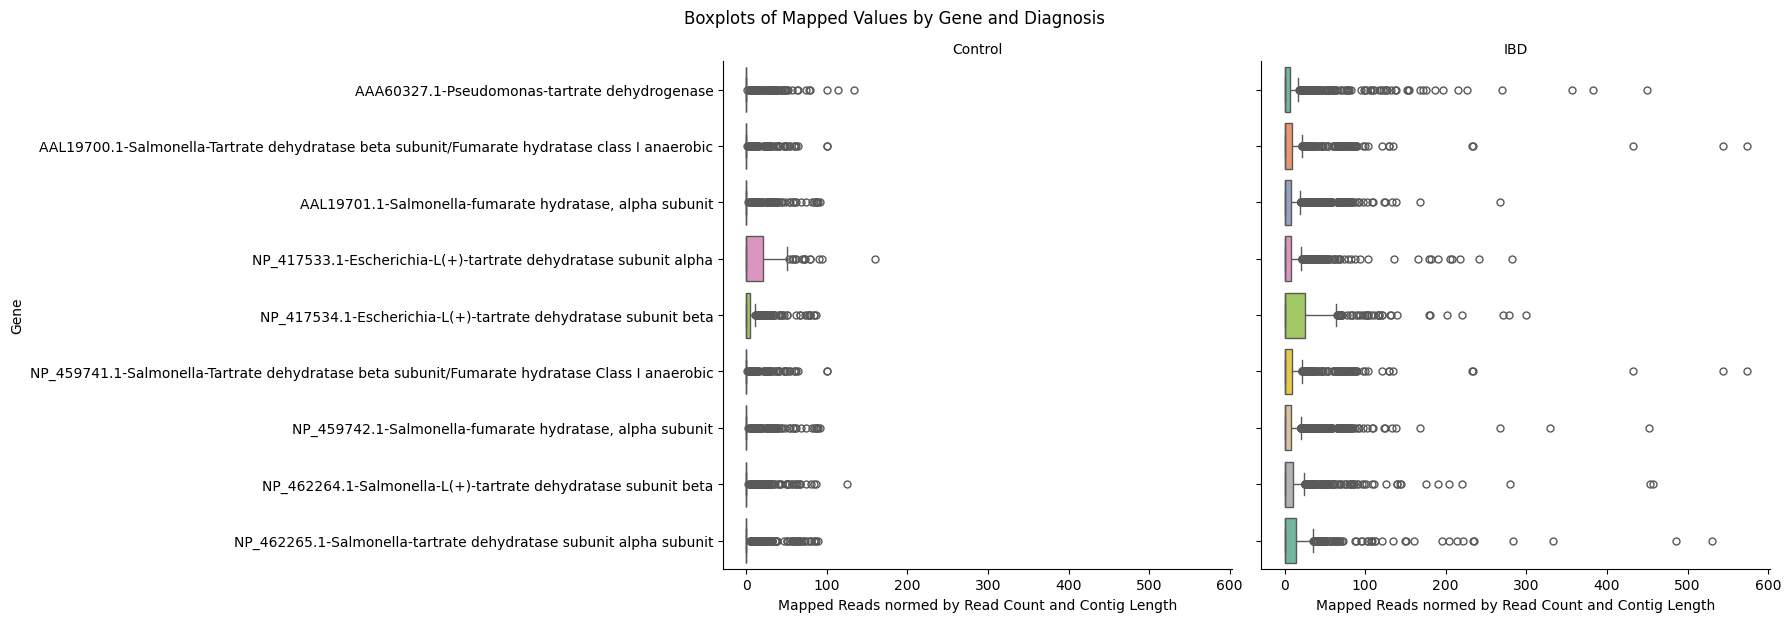

In [45]:
# While the distribution seems to show an increase in genes 
p = sns.catplot(
    data=long_table,
    x="mapped_norm_by_read_count_and_contig_length",
    y="name",
    hue="name", 
    kind="box",
    col="diagnosis",
    palette="Set2",
    height=6,
    aspect=1.5
)
p.set_titles(col_template="{col_name}")
p.set_xlabels("Mapped Reads normed by Read Count and Contig Length")
p.set_ylabels("Gene")

plt.suptitle("Boxplots of Mapped Values by Gene and Diagnosis", y=1.03)
plt.show()

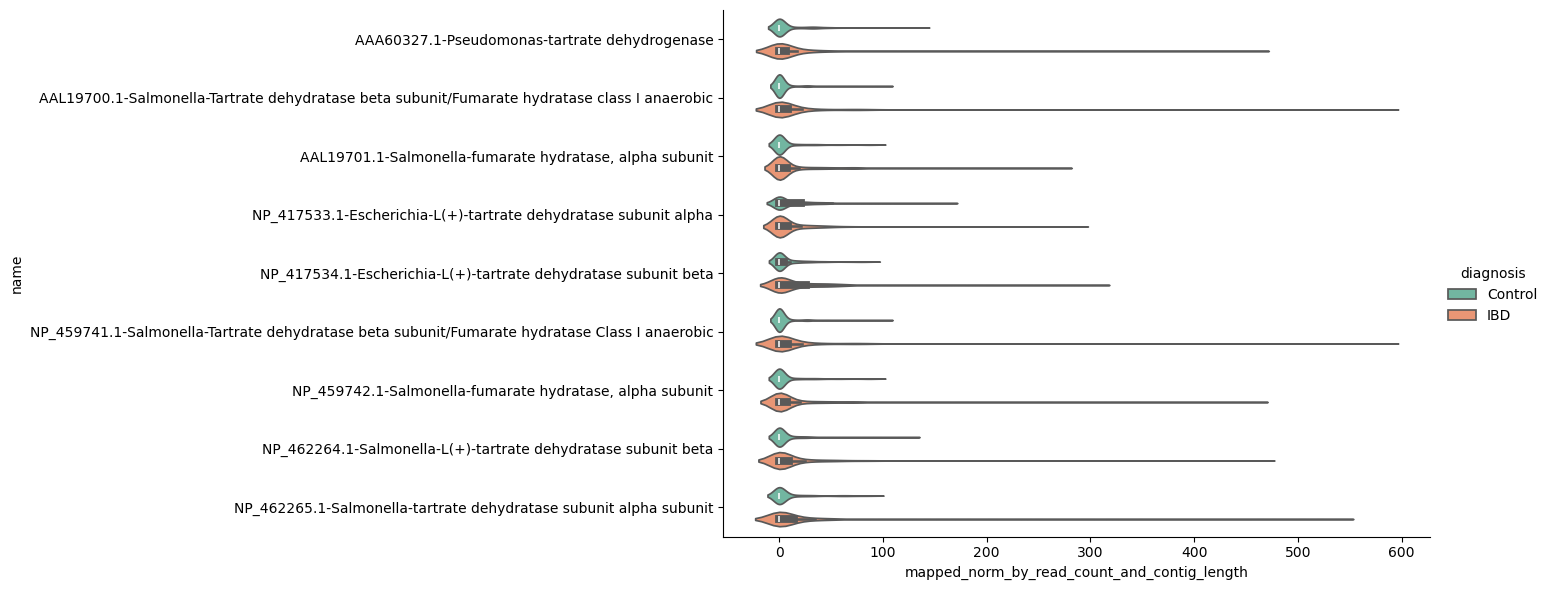

In [51]:
sns.catplot(
    data=long_table,
    x="mapped_norm_by_read_count_and_contig_length",
    y="name",
    hue="diagnosis",
    kind="violin",
    palette="Set2",
    height=6,
    aspect=2.5
)

#plt.savefig('coverage_violin.png', dpi=300, bbox_inches='tight')
plt.show()

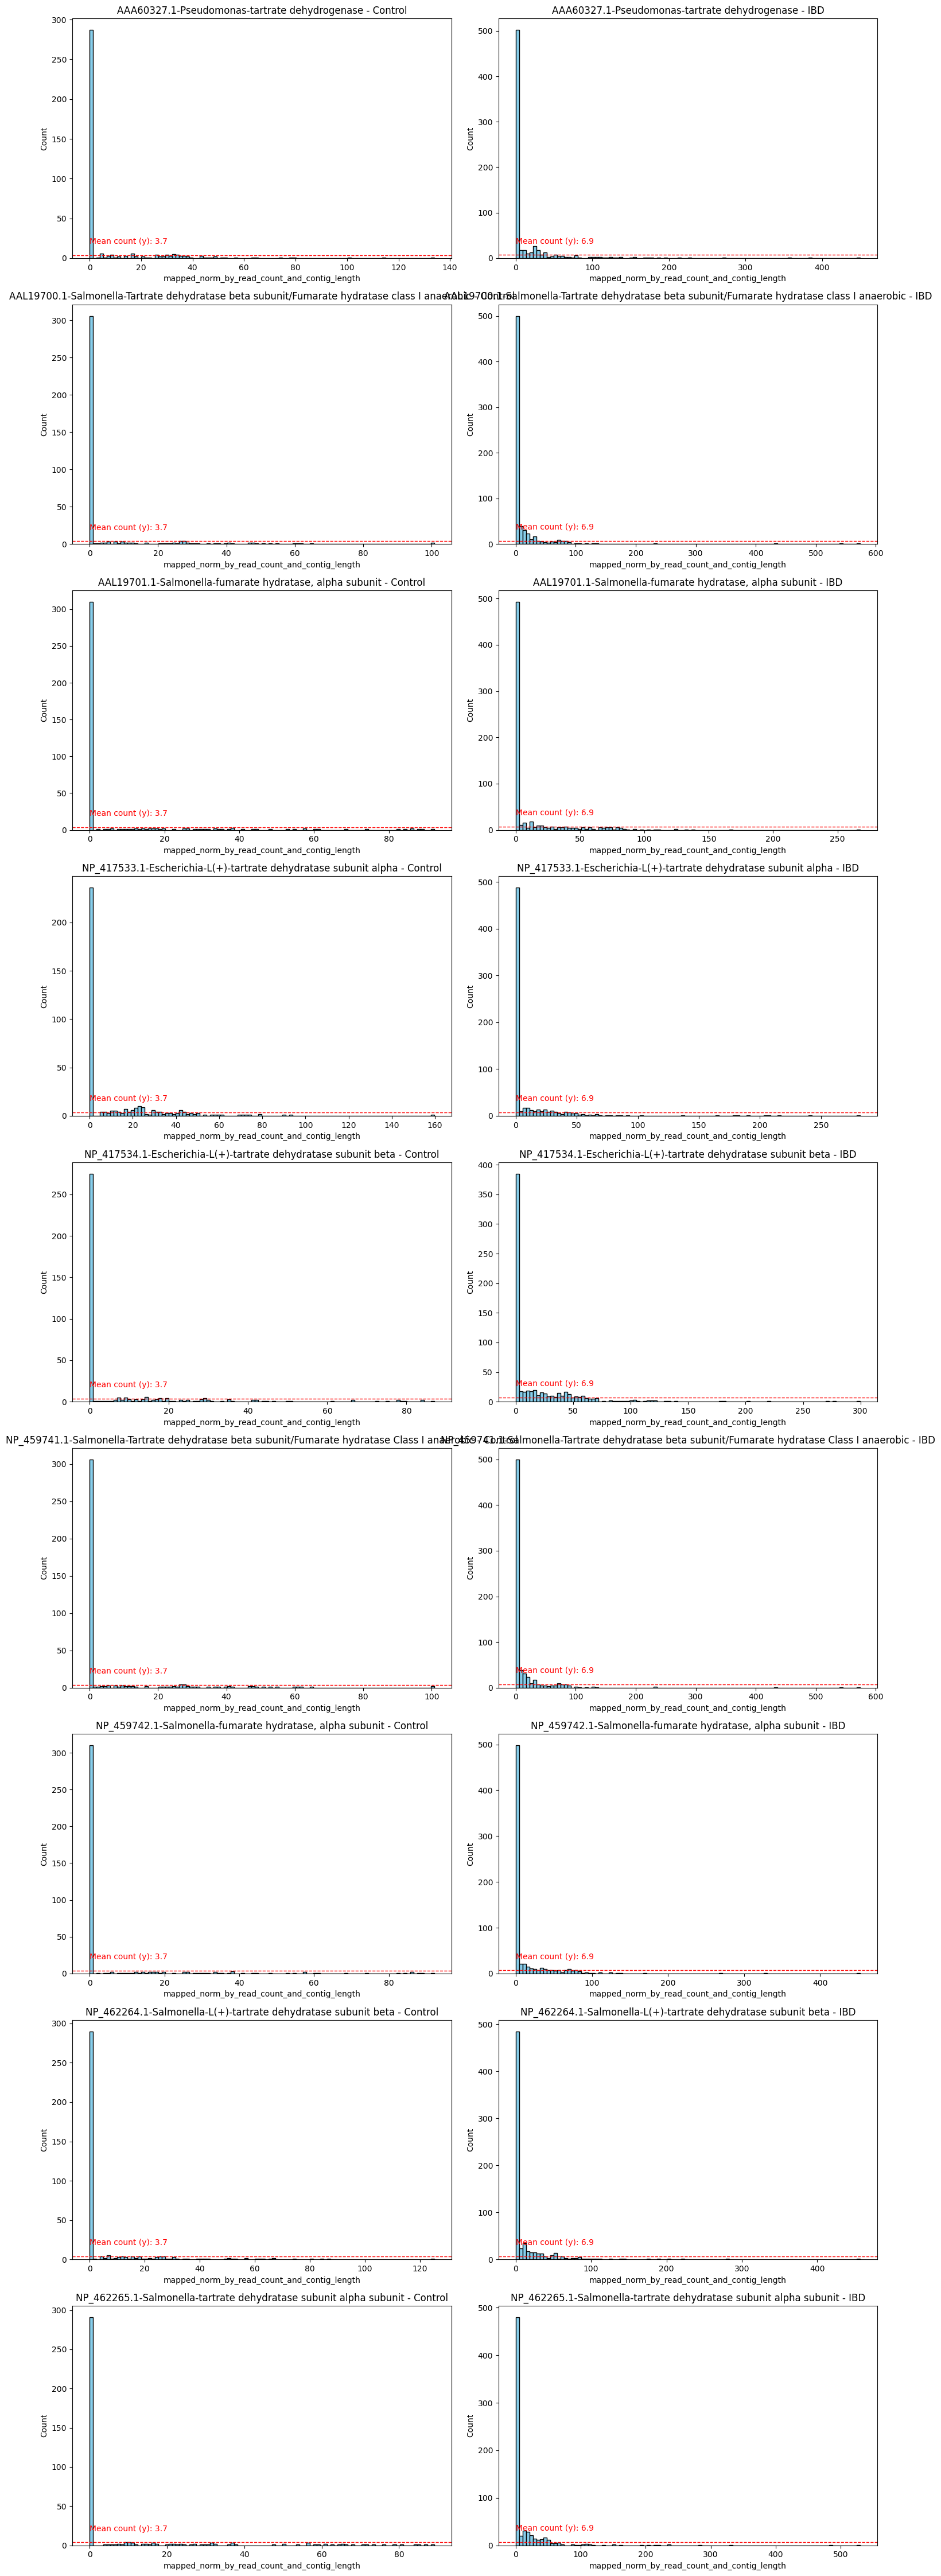

In [52]:
df = long_table[long_table['mapped_norm_by_read_count_and_contig_length'] > 0]
df = long_table
# Get unique gene and diagnosis combinations
genes = df['name'].unique()
diagnoses = df['diagnosis'].unique()

fig, axes = plt.subplots(len(genes), len(diagnoses), figsize=(15, 5 * len(genes)), sharex=False, sharey=False)

for i, gene in enumerate(genes):
    for j, diagnosis in enumerate(diagnoses):
        ax = axes[i, j] if len(genes) > 1 else axes[j]  # handle 1-row case

        subset = df[(df['name'] == gene) & (df['diagnosis'] == diagnosis)]

        # Plot histogram and get the bins
        counts, bins, patches = ax.hist(
            subset['mapped_norm_by_read_count_and_contig_length'],
            bins=100,
            color='skyblue',
            edgecolor='black'
        )

        # Calculate and annotate mean of y (i.e., mean bin count)
        mean_y = counts.mean()
        ax.axhline(mean_y, color='red', linestyle='--', linewidth=1)
        ax.text(
            bins[0], mean_y + max(counts) * 0.05,
            f'Mean count (y): {mean_y:.1f}',
            color='red'
        )

        ax.set_title(f'{gene} - {diagnosis}')
        ax.set_xlabel('mapped_norm_by_read_count_and_contig_length')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [58]:
mean_depth = long_table.groupby(['name', 'diagnosis'])['mapped_norm_by_read_count_and_contig_length'].mean().reset_index(name='mean_depth')
print(mean_depth)

                                                 name diagnosis  mean_depth
0       AAA60327.1-Pseudomonas-tartrate dehydrogenase   Control    7.246135
1       AAA60327.1-Pseudomonas-tartrate dehydrogenase       IBD   14.427246
2   AAL19700.1-Salmonella-Tartrate dehydratase bet...   Control    4.998215
3   AAL19700.1-Salmonella-Tartrate dehydratase bet...       IBD   12.254187
4   AAL19701.1-Salmonella-fumarate hydratase, alph...   Control    5.790584
5   AAL19701.1-Salmonella-fumarate hydratase, alph...       IBD   11.629665
6   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...   Control   11.340897
7   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...       IBD   10.491034
8   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...   Control    7.018437
9   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...       IBD   18.246221
10  NP_459741.1-Salmonella-Tartrate dehydratase be...   Control    4.998215
11  NP_459741.1-Salmonella-Tartrate dehydratase be...       IBD   12.254187
12  NP_45974

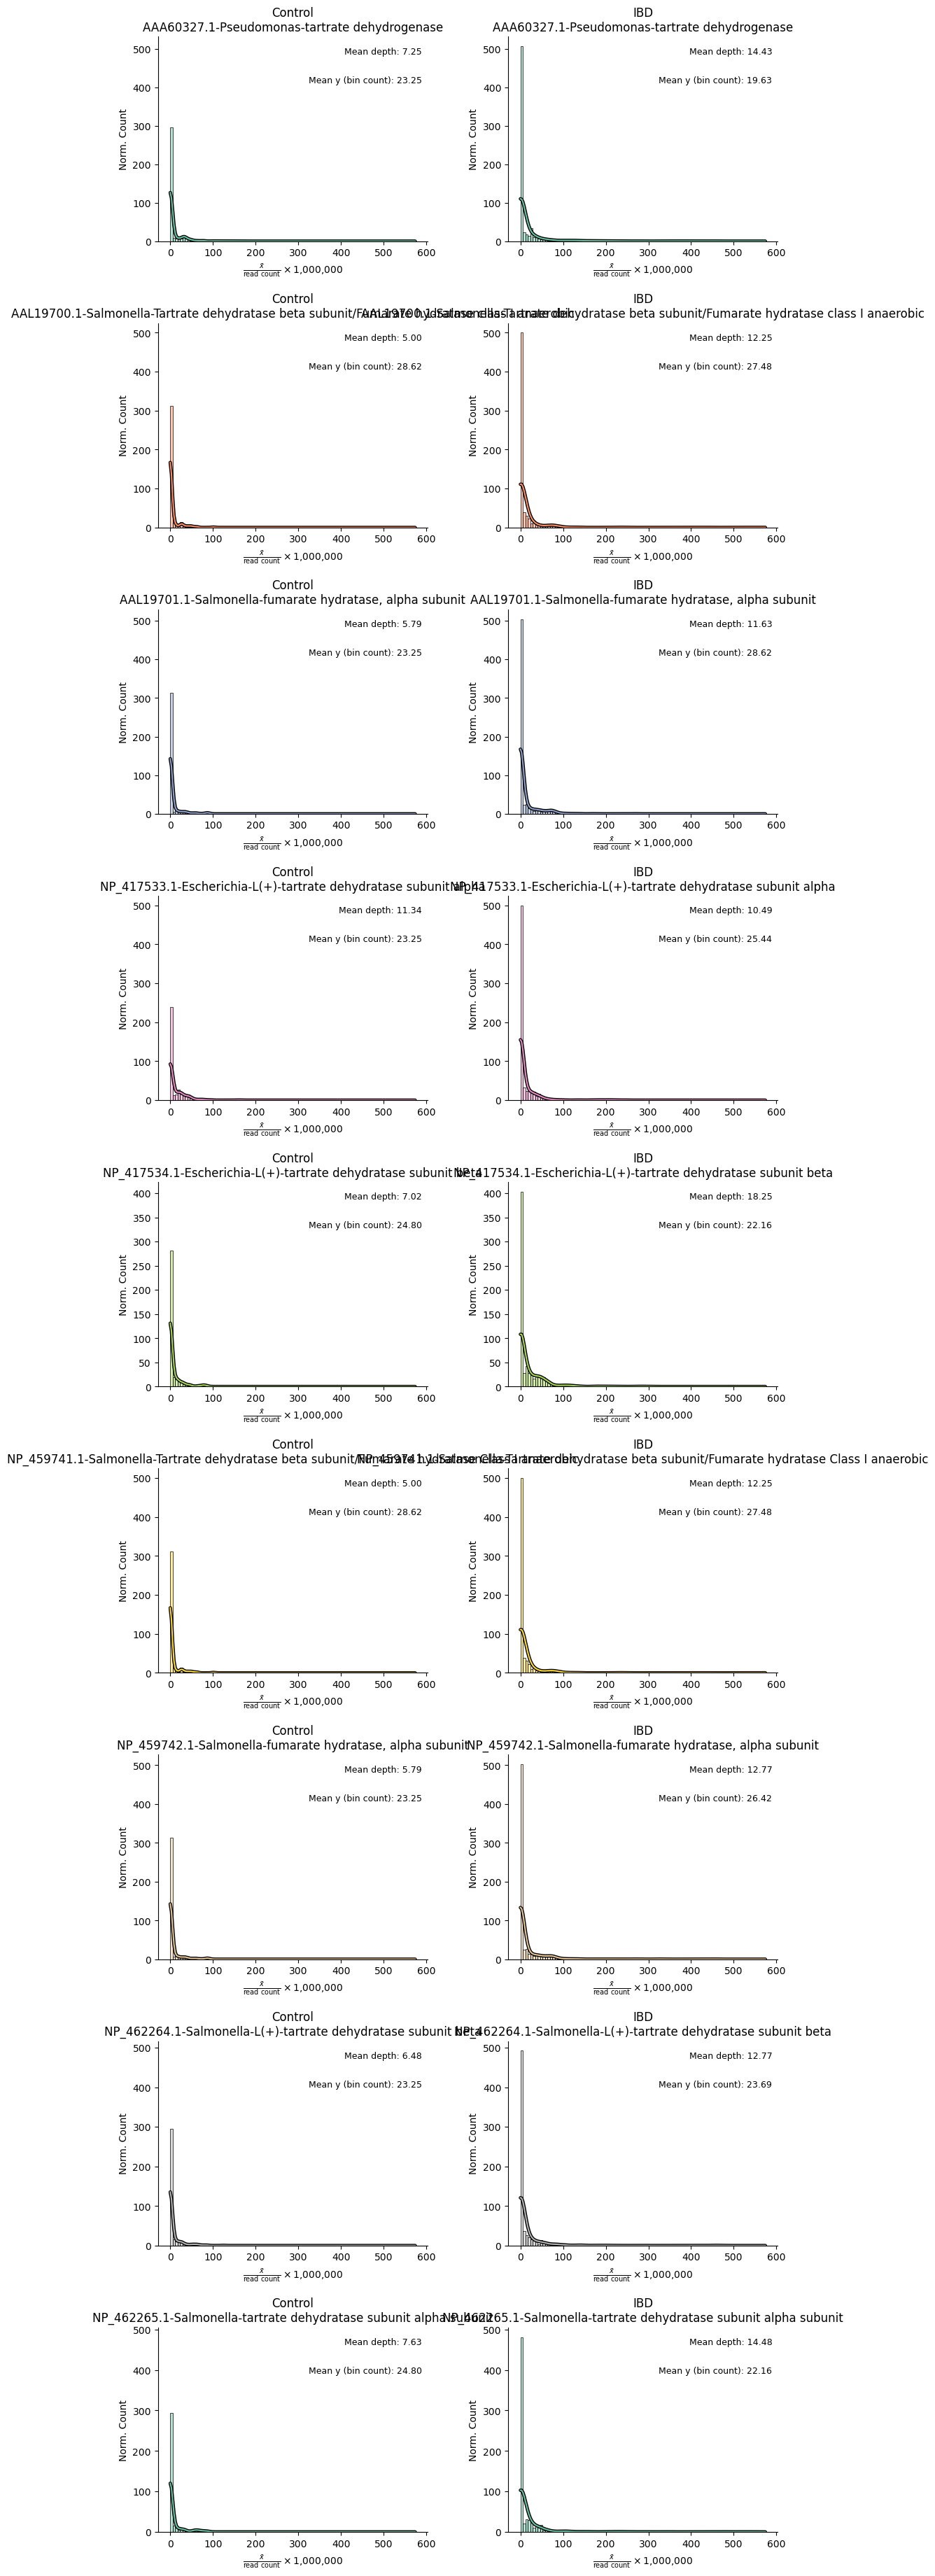

In [65]:
p = sns.displot(
    data=long_table,
    x="mapped_norm_by_read_count_and_contig_length",
    hue="name",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='name',
    kde=True,
    #weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

    # Get the bar heights (i.e., counts in each bin)
    bin_counts = [patch.get_height() for patch in ax.patches if patch.get_height() > 0]
    
    # Compute mean of the bin heights (mean y-value)
    mean_con = sum(bin_counts) / len(bin_counts) if bin_counts else 0

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        name = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = mean_depth[(mean_depth['name'] == name) & (mean_depth['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_depth'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.81,  # Lower position to stack nicely
            f"Mean y (bin count): {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )

    ax.set_title(f'{diagnosis}\n{name}')
    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p._legend.remove()
p.fig.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.20)  # add space for x axis
#plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

In [67]:
long_table_no_zeros = long_table[long_table['mapped_norm_by_read_count_and_contig_length'] != 0]
mean_depth_no_zeros = long_table_no_zeros.groupby(['name', 'diagnosis'])['mapped_norm_by_read_count_and_contig_length'].mean().reset_index(name='mean_depth')
print(mean_depth_no_zeros)

                                                 name diagnosis  mean_depth
0       AAA60327.1-Pseudomonas-tartrate dehydrogenase   Control   31.343745
1       AAA60327.1-Pseudomonas-tartrate dehydrogenase       IBD   50.058173
2   AAL19700.1-Salmonella-Tartrate dehydratase bet...   Control   28.171757
3   AAL19700.1-Salmonella-Tartrate dehydratase bet...       IBD   42.093133
4   AAL19701.1-Salmonella-fumarate hydratase, alph...   Control   34.743502
5   AAL19701.1-Salmonella-fumarate hydratase, alph...       IBD   40.972203
6   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...   Control   31.020688
7   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...       IBD   35.504141
8   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...   Control   26.916066
9   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...       IBD   40.964555
10  NP_459741.1-Salmonella-Tartrate dehydratase be...   Control   28.171757
11  NP_459741.1-Salmonella-Tartrate dehydratase be...       IBD   42.093133
12  NP_45974

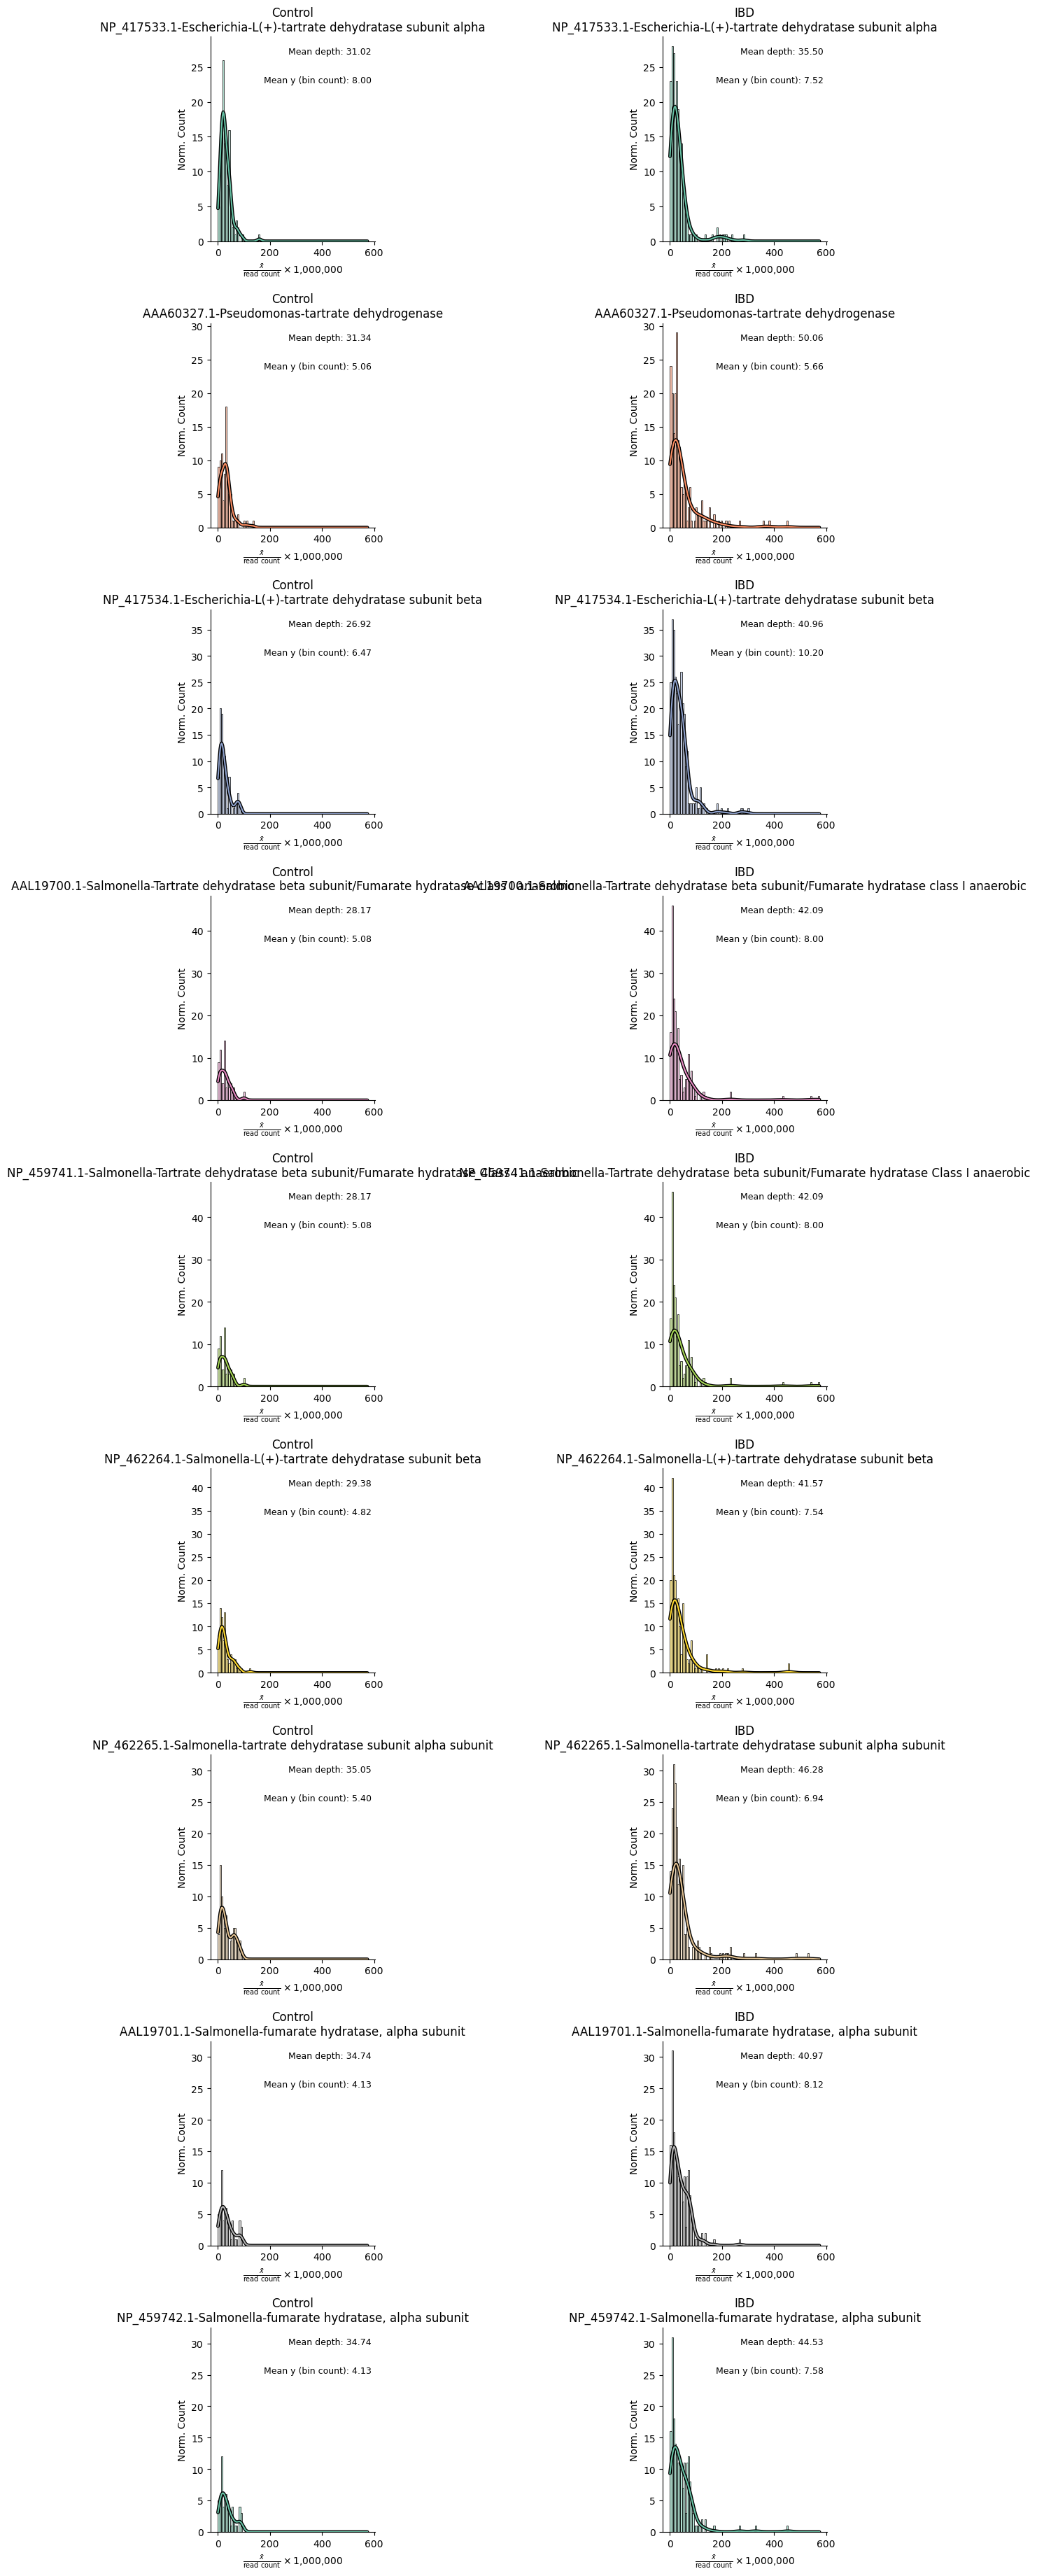

In [73]:
p = sns.displot(
    data=long_table_no_zeros,
    x="mapped_norm_by_read_count_and_contig_length",
    hue="name",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='name',
    kde=True,
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

    # Get the bar heights (i.e., counts in each bin)
    bin_counts = [patch.get_height() for patch in ax.patches if patch.get_height() > 0]
    
    # Compute mean of the bin heights (mean y-value)
    mean_con = sum(bin_counts) / len(bin_counts) if bin_counts else 0

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        name = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = mean_depth_no_zeros[(mean_depth_no_zeros['name'] == name) & (mean_depth_no_zeros['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_depth'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.81,  # Lower position to stack nicely
            f"Mean y (bin count): {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )


    ax.set_title(f'{diagnosis}\n{name}')
    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p._legend.remove()
p.fig.subplots_adjust(hspace=0.4, wspace=1.75, bottom=0.20)  # add space for x axis

#plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

In [22]:
wide_table = df_simple.pivot_table(
    index='run',
    columns='name',
    values='mapped_norm_by_read_count_and_contig_length',
    aggfunc='sum',  # sum seems to be the highest value and not the sum of values?
    fill_value=0
)
wide_table

gene,AAA60327.1,AAL19700.1,AAL19701.1,NP_417533.1,NP_417534.1,NP_459741.1,NP_459742.1,NP_462264.1,NP_462265.1
run,,,,,,,,,
ERR011087,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
ERR011088,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
ERR011089,0.000000,0.000000,0.000000,79.279626,0.00000,0.000000,0.000000,0.000000,0.000000
ERR011090,0.000000,0.000000,0.000000,61.379841,0.00000,0.000000,0.000000,0.000000,0.000000
ERR011091,0.000000,0.000000,0.000000,72.032781,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
SRR6468714,154.132790,35.216714,12.134694,12.502780,0.00000,35.216714,12.134694,14.090286,22.525670
SRR6468715,59.015700,16.514660,16.253634,12.767315,0.00000,16.514660,16.253634,5.011322,15.225604
SRR6468716,52.090488,27.543675,20.612247,40.876125,11.90798,27.543675,20.612247,11.907980,23.512422


In [74]:
heatmap_data = df_simple_filter.pivot_table(
    index='name',
    columns='diagnosis',
    values='mapped_norm_by_read_count_and_contig_length',    # 'average_depth', or 'mapped'
    aggfunc='count'      # 'count', or 'mean'
)
heatmap_data

diagnosis,Control,IBD
name,,
AAA60327.1-Pseudomonas-tartrate dehydrogenase,130,370
AAL19700.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase class I anaerobic,169,404
"AAL19701.1-Salmonella-fumarate hydratase, alpha subunit",156,343
NP_417533.1-Escherichia-L(+)-tartrate dehydratase subunit alpha,207,292
NP_417534.1-Escherichia-L(+)-tartrate dehydratase subunit beta,132,367
NP_459741.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase Class I anaerobic,169,404
"NP_459742.1-Salmonella-fumarate hydratase, alpha subunit",156,386
NP_462264.1-Salmonella-L(+)-tartrate dehydratase subunit beta,153,397
NP_462265.1-Salmonella-tartrate dehydratase subunit alpha subunit,167,406


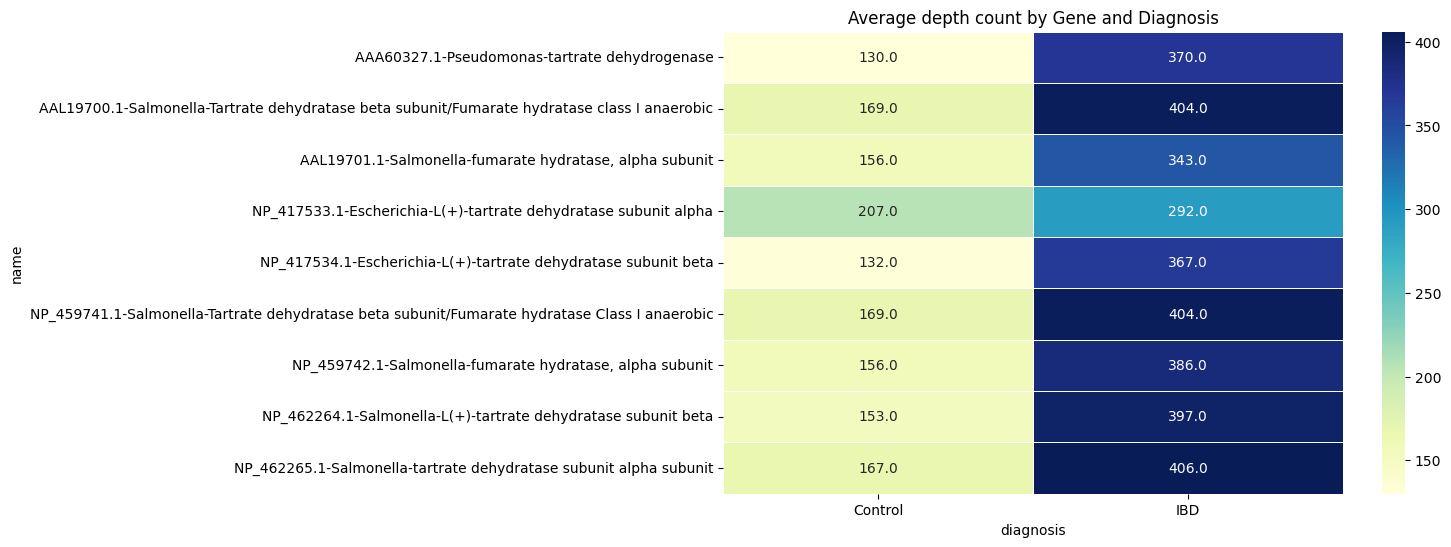

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Average depth count by Gene and Diagnosis')

#plt.savefig('coverage_mean.png', dpi=300, bbox_inches='tight')
plt.show()

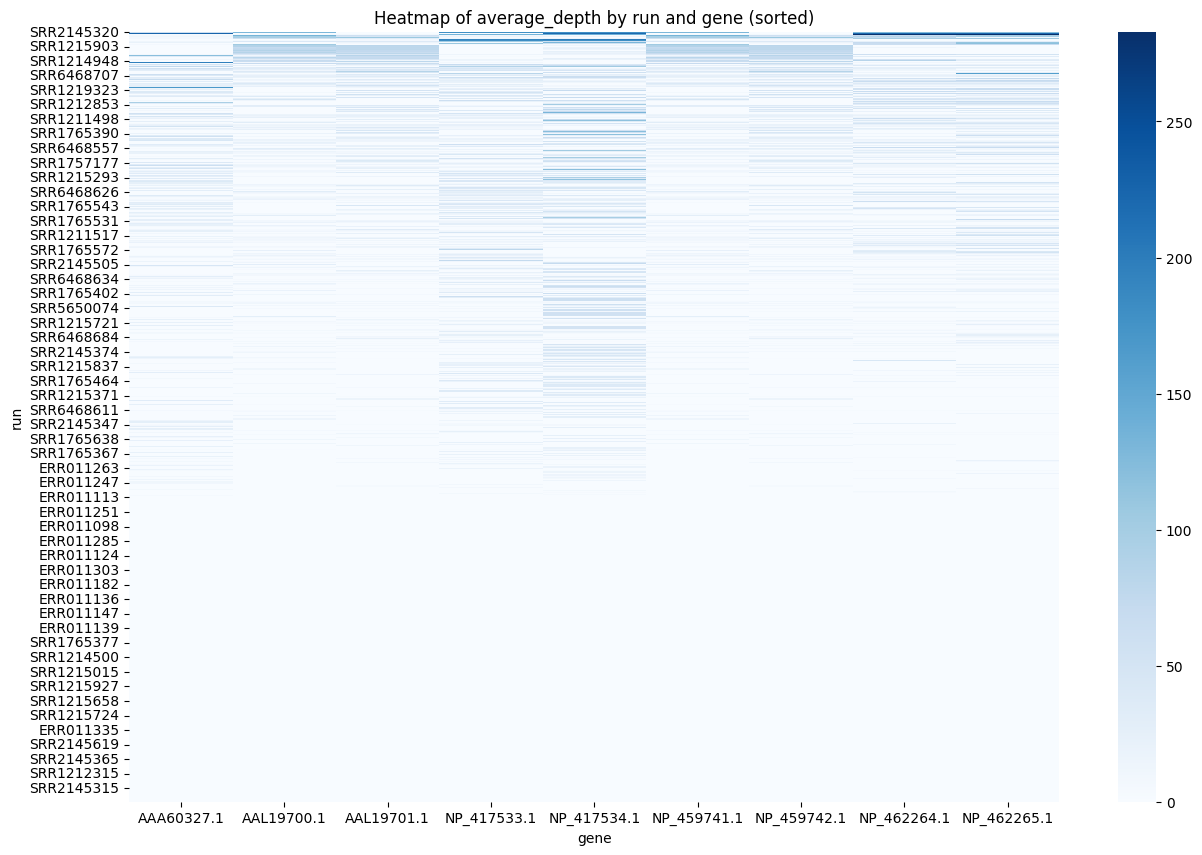

In [25]:
hd = df_simple.pivot_table(index="run", columns="name", values="mapped_norm_by_read_count_and_contig_length")

hd_filled = hd.fillna(hd.mean().mean())

# Sort by row means to get some order
hd_sorted = hd_filled.loc[hd_filled.mean(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(15,10))
sns.heatmap(hd_sorted, cmap='Blues')
plt.title("Heatmap of average_depth by run and gene (sorted)")
plt.show()

In [76]:
###### filter with the `filtered_df` dataframe or full heatmap with df_simple
hd = df_simple.pivot_table(index="run", columns="gene", values="mapped_norm_by_read_count_and_contig_length") #filtered_df, df_simple?
######

# Diagnosis lookup
run_to_diag = df_simple.set_index('run')['diagnosis']
diag_for_runs = run_to_diag.loc[hd.index]


In [77]:
hd = df_simple.pivot_table(index="run", columns="gene", values="mapped_norm_by_read_count_and_contig_length") #filtered_df, df_simple?
hd

# Diagnosis lookup
run_to_diag = df_simple.groupby('run')['diagnosis'].first()

print(run_to_diag)
diag_for_runs = run_to_diag.loc[hd.index]
print(diag_for_runs)
# Sort by diagnosis first, then by row mean within each group
sorted_runs = diag_for_runs.sort_values().index
hd_sorted = hd.loc[sorted_runs]
diagnosis_sorted = diag_for_runs.loc[sorted_runs]
print(diagnosis_sorted)

run
ERR011087     Control
ERR011088     Control
ERR011089     Control
ERR011090     Control
ERR011091     Control
               ...   
SRR6468714        IBD
SRR6468715        IBD
SRR6468716        IBD
SRR6468717        IBD
SRR6468718        IBD
Name: diagnosis, Length: 1059, dtype: object
run
ERR011087     Control
ERR011088     Control
ERR011089     Control
ERR011090     Control
ERR011091     Control
               ...   
SRR6468714        IBD
SRR6468715        IBD
SRR6468716        IBD
SRR6468717        IBD
SRR6468718        IBD
Name: diagnosis, Length: 1059, dtype: object
run
ERR011087     Control
SRR6468616    Control
SRR6468617    Control
SRR6468621    Control
SRR6468622    Control
               ...   
SRR1765126        IBD
SRR1765155        IBD
SRR1765168        IBD
SRR1219323        IBD
SRR6468718        IBD
Name: diagnosis, Length: 1059, dtype: object


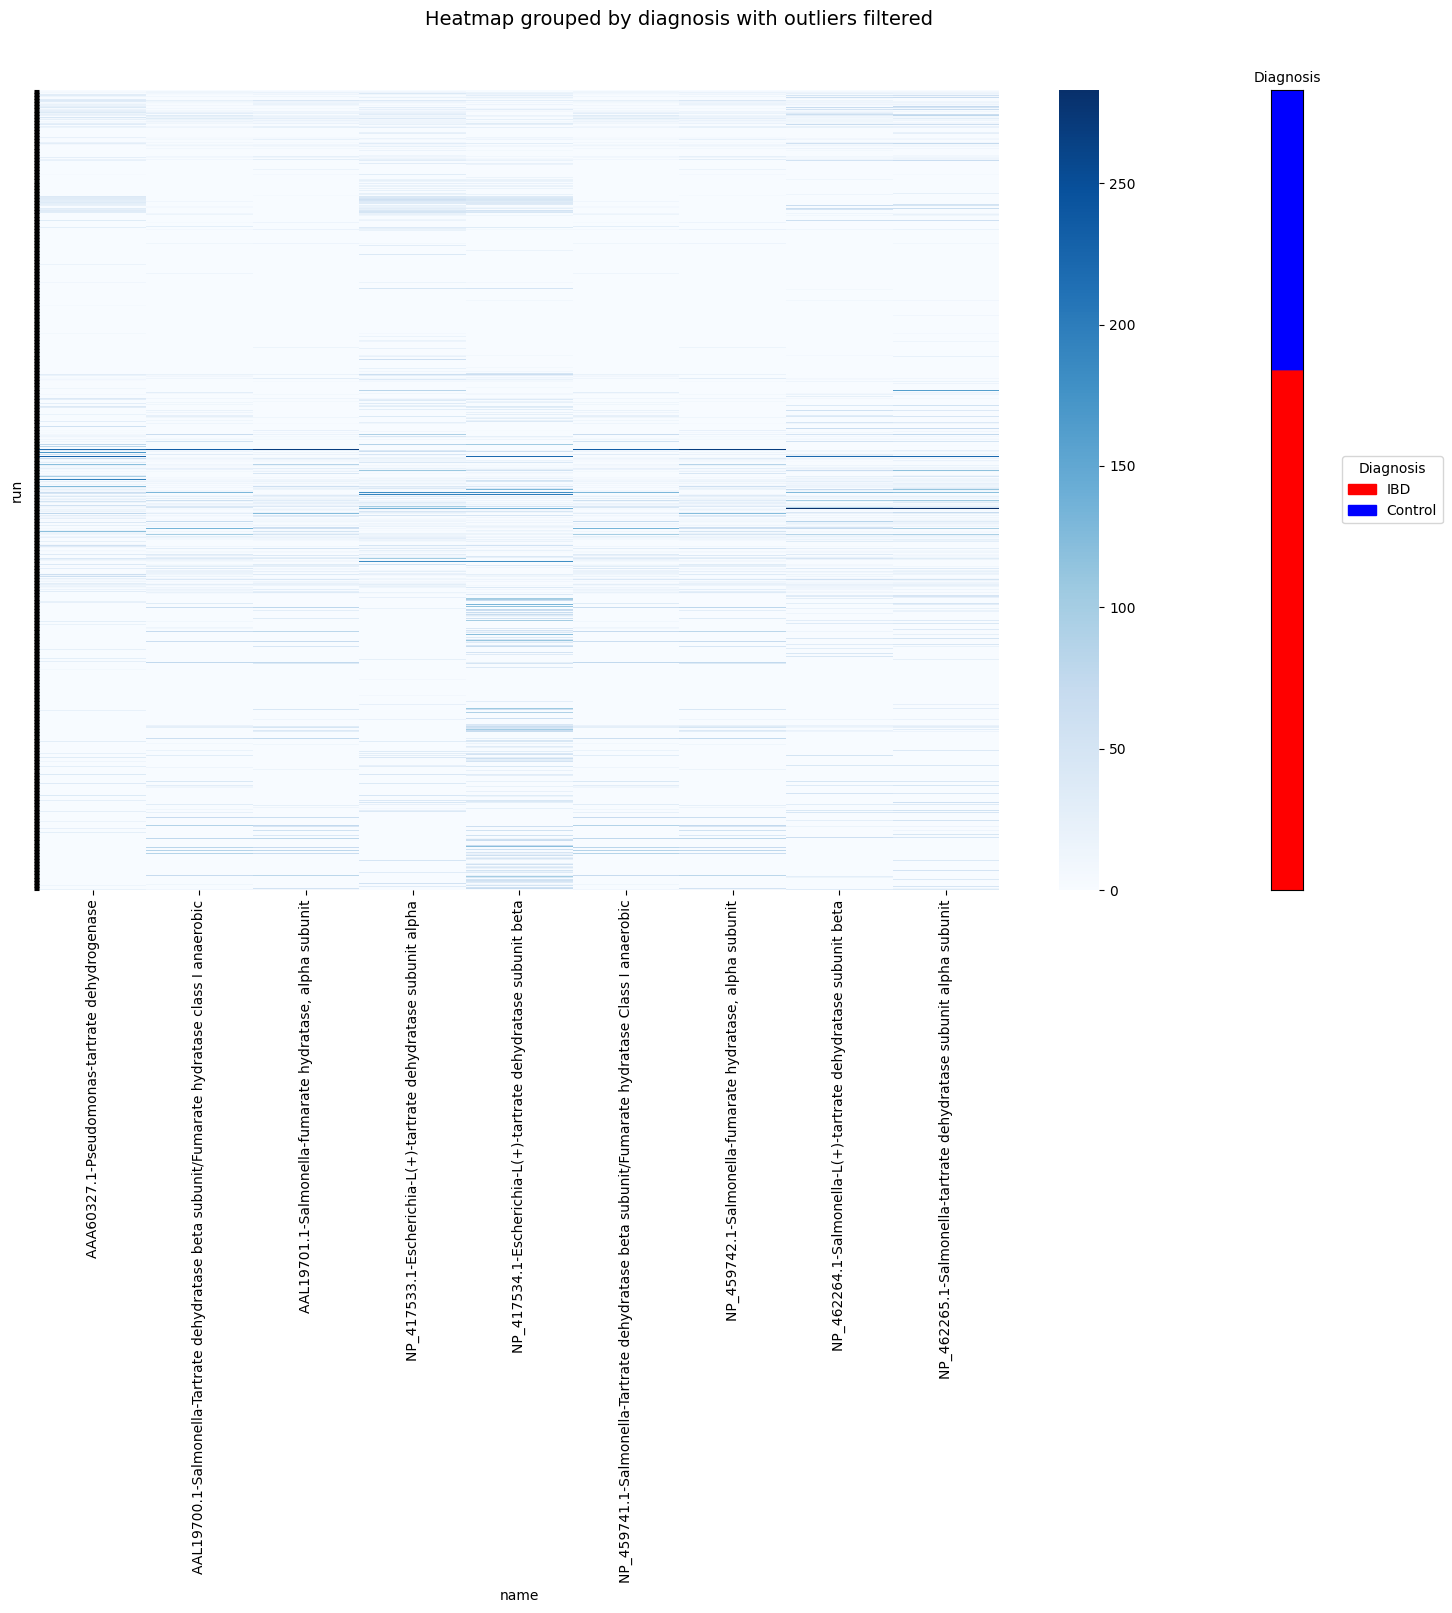

In [82]:

###### filter with the `filtered_df` dataframe or full heatmap with df_simple
hd = df_simple.pivot_table(index="run", columns="name", values="mapped_norm_by_read_count_and_contig_length") #filtered_df, df_simple?
######

# Diagnosis lookup
run_to_diag = df_simple.groupby('run')['diagnosis'].first()
diag_for_runs = run_to_diag.loc[hd.index]

# Sort by diagnosis first, then by row mean within each group
sorted_runs = diag_for_runs.sort_values().index
hd_sorted = hd.loc[sorted_runs]
diagnosis_sorted = diag_for_runs.loc[sorted_runs]

# Create a palette and color array
palette = {'IBD': 'red', 'Control': 'blue'}
diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

# === Plot heatmap + side diagnosis color bar ===
fig = plt.figure(figsize=(16, 10))

# Heatmap axis
ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax1, cbar=True)
ax1.set_yticks(np.arange(len(hd_sorted)) + 0.5)
ax1.set_yticklabels([])

# Color bar axis for diagnosis strip
ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

# Add legend manually
handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with outliers filtered", fontsize=14)

plt.savefig('coverage_heatmap_filtered_outliers.png', dpi=300, bbox_inches='tight')

plt.show()

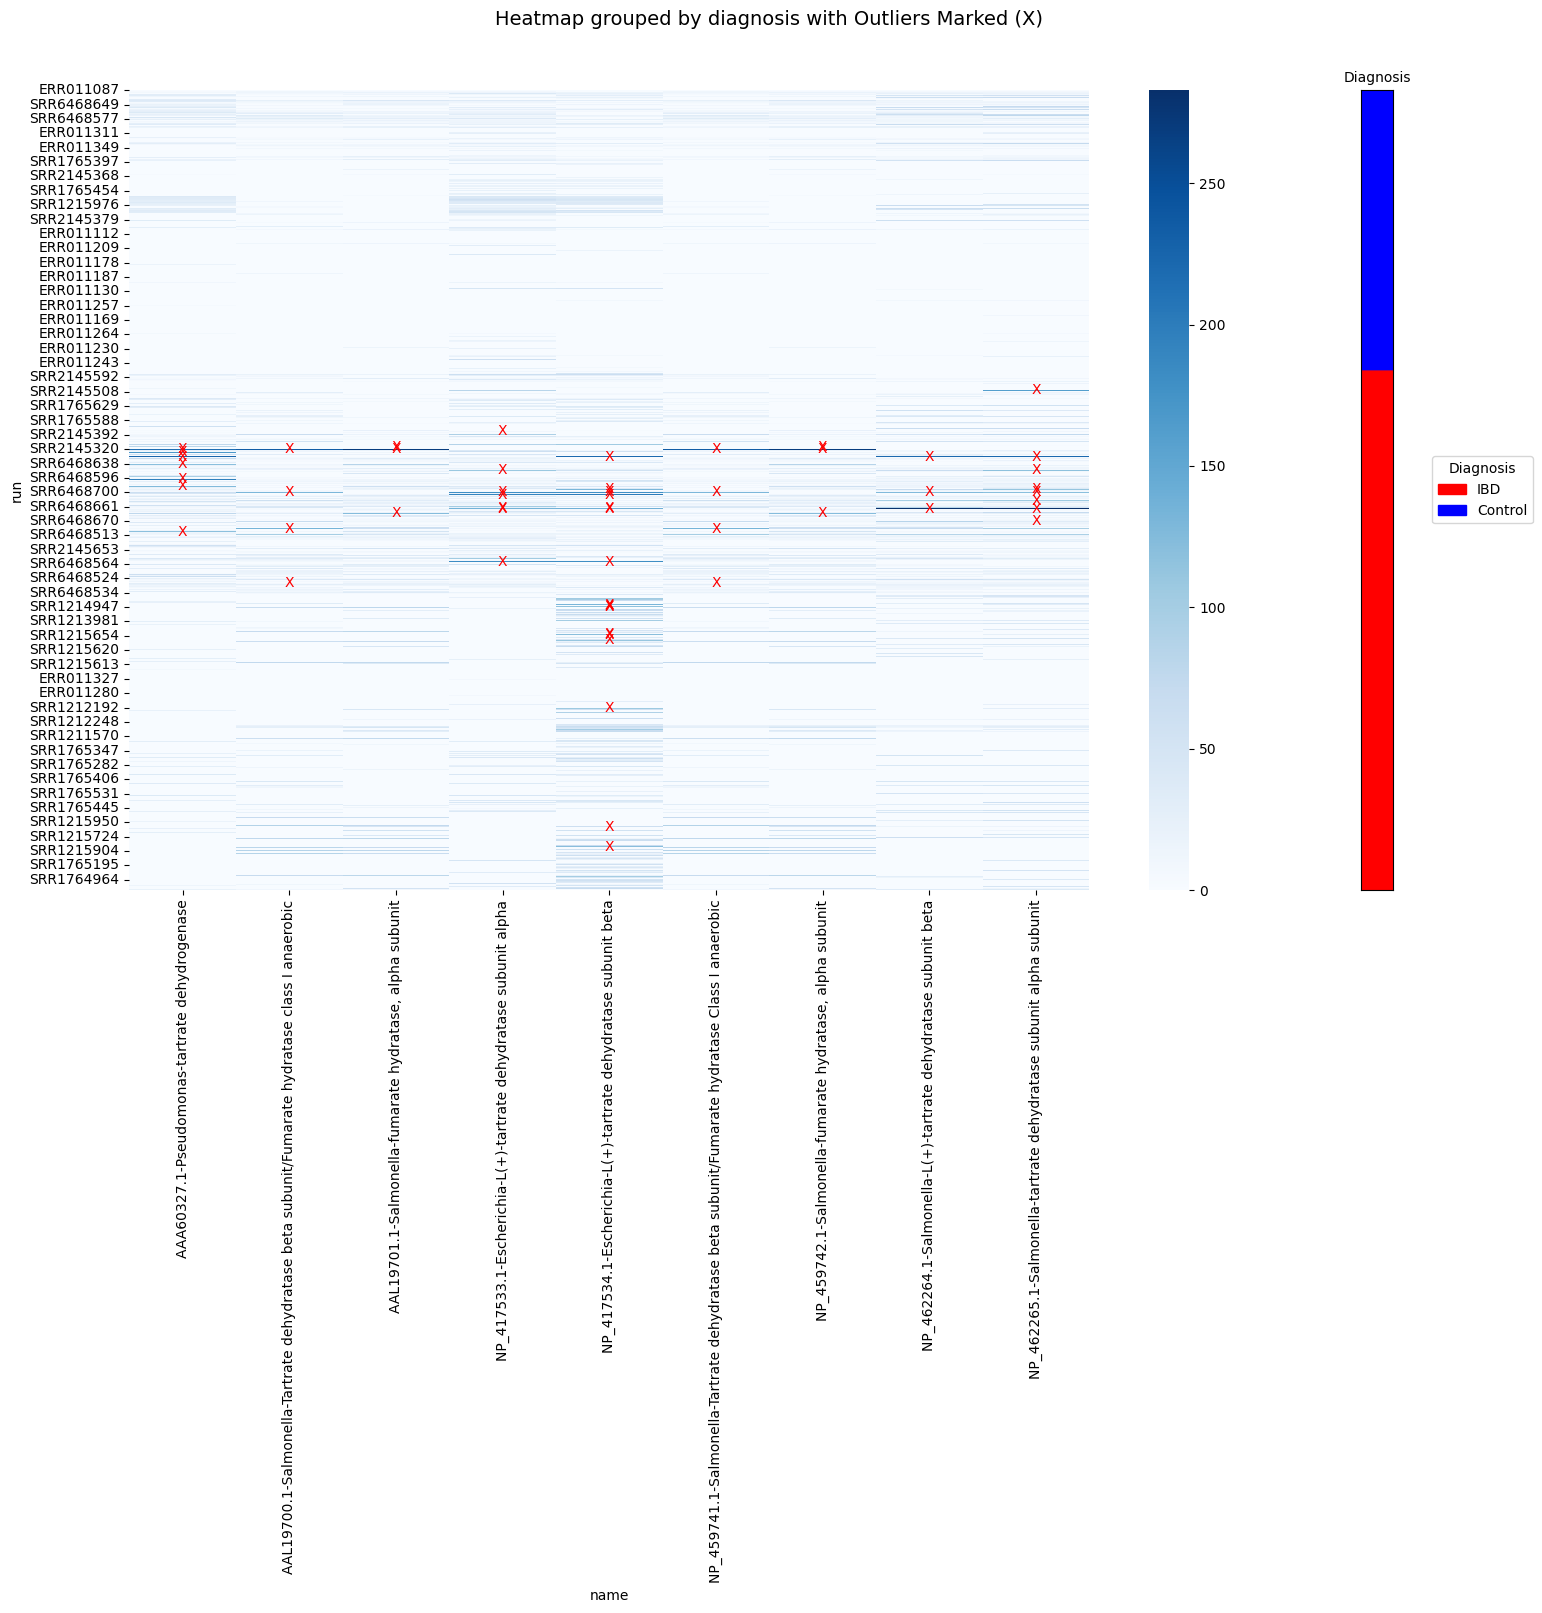

In [83]:
mean_val = long_table['mapped_norm_by_read_count_and_contig_length'].mean()
std_val = long_table['mapped_norm_by_read_count_and_contig_length'].std()

lower_bound = mean_val - 3 * std_val
upper_bound = mean_val + 3 * std_val

#df_simple_filter_outlierless = df_simple_filter[(df_simple_filter['average_depth'] >= lower_bound) & (df_simple_filter['average_depth'] <= upper_bound)]

outlier_mask = (hd_sorted < lower_bound) | (hd_sorted > upper_bound)

diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

fig = plt.figure(figsize=(16, 10))

ax = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax, cbar=True)

for y in range(hd_sorted.shape[0]):
    for x in range(hd_sorted.shape[1]):
        if outlier_mask.iloc[y, x]:
            ax.text(x + 0.5, y + 0.5, 'X', ha='center', va='center', color='red', fontsize=10)

ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with Outliers Marked (X)", fontsize=14)

#plt.savefig('coverage_heatmap_full_marked_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
outlier_mask[outlier_mask.any(axis=1)]

In [86]:
outlier_mask[outlier_mask.any(axis=1)].sum()

name
AAA60327.1-Pseudomonas-tartrate dehydrogenase                                                     7
AAL19700.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase class I anaerobic      4
AAL19701.1-Salmonella-fumarate hydratase, alpha subunit                                           3
NP_417533.1-Escherichia-L(+)-tartrate dehydratase subunit alpha                                   7
NP_417534.1-Escherichia-L(+)-tartrate dehydratase subunit beta                                   16
NP_459741.1-Salmonella-Tartrate dehydratase beta subunit/Fumarate hydratase Class I anaerobic     4
NP_459742.1-Salmonella-fumarate hydratase, alpha subunit                                          3
NP_462264.1-Salmonella-L(+)-tartrate dehydratase subunit beta                                     3
NP_462265.1-Salmonella-tartrate dehydratase subunit alpha subunit                                 8
dtype: int64

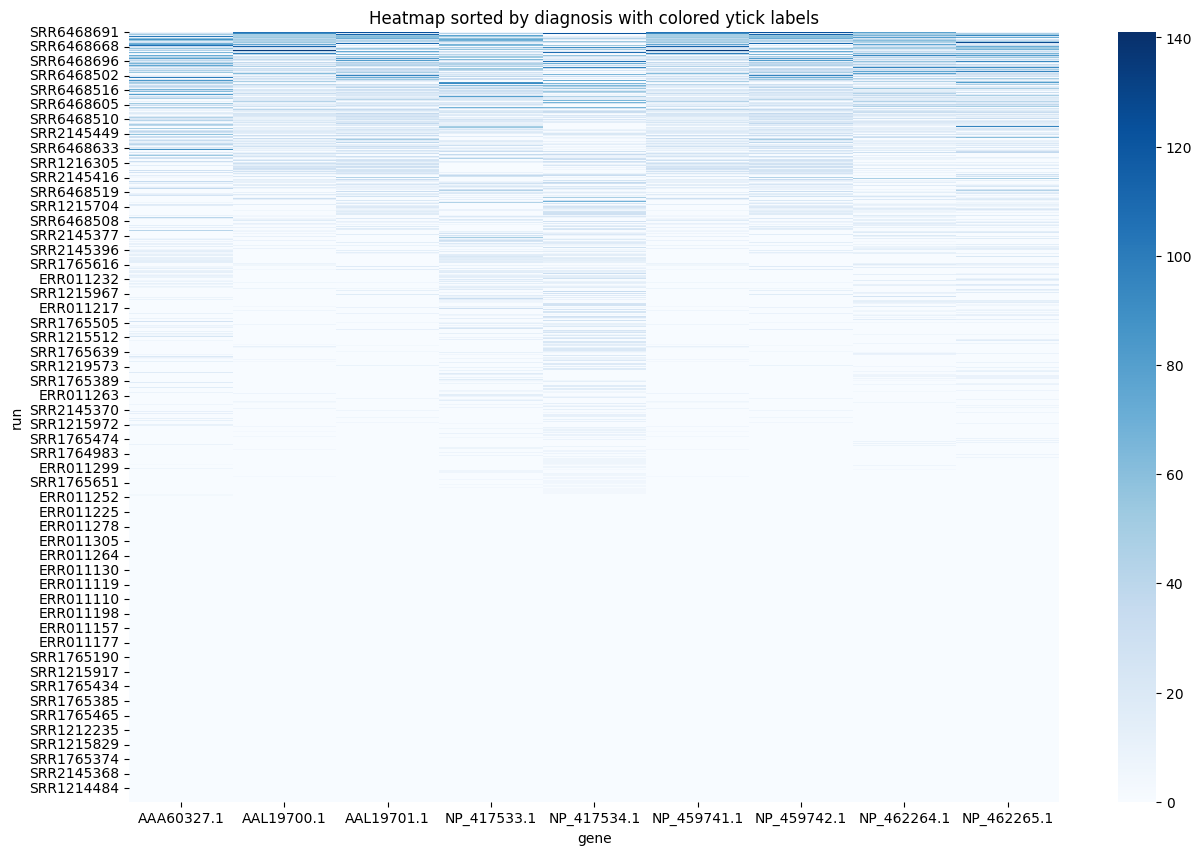

In [31]:
# Calculate mean and std deviation
mean_val = df_simple['average_depth'].mean()
std_val = df_simple['average_depth'].std()

# Define lower and upper bounds
lower_bound = mean_val - 3 * std_val
upper_bound = mean_val + 3 * std_val

# Filter rows where average_depth is within ±3 SD
filtered_df = df_simple[(df_simple['average_depth'] >= lower_bound) & (df_simple['average_depth'] <= upper_bound)]

hd = filtered_df.pivot_table(index="run", columns="gene", values="average_depth")

hd_filled = hd.fillna(hd.mean().mean())

# Sort by row means to get some order
hd_sorted = hd_filled.loc[hd_filled.mean(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(hd_sorted, cmap='Blues', ax=ax, cbar=True)

plt.title("Heatmap sorted by diagnosis with colored ytick labels")
plt.show()

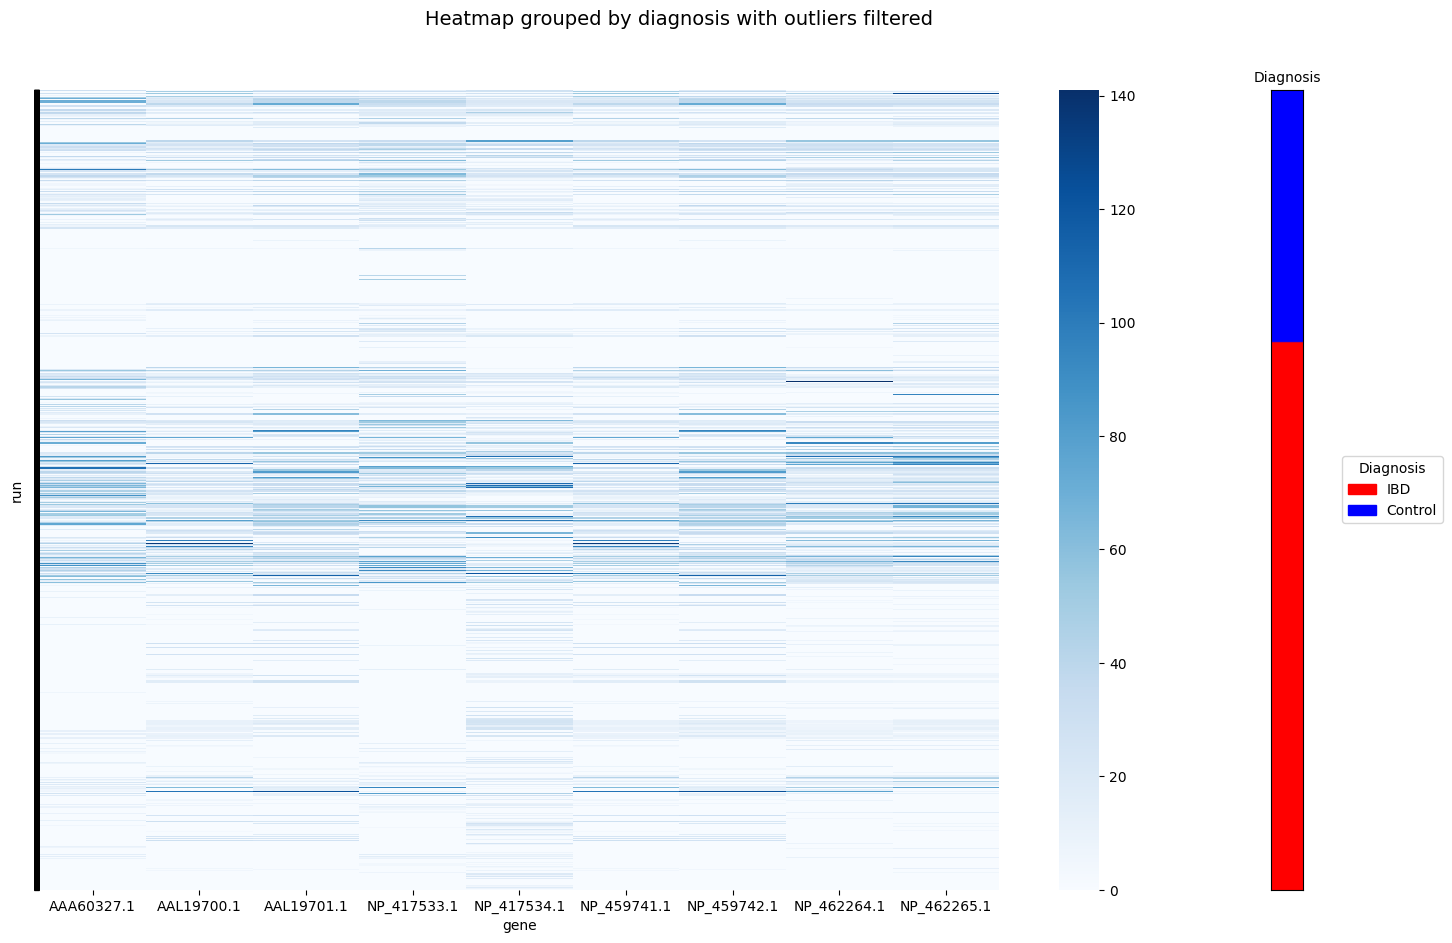

In [32]:

###### filter with the `filtered_df` dataframe or full heatmap with df_simple
hd = filtered_df.pivot_table(index="run", columns="gene", values="average_depth") #filtered_df, df_simple?
hd_filled = hd.fillna(hd.mean().mean())
######

# Diagnosis lookup
run_to_diag = df_simple.set_index('run')['diagnosis']
diag_for_runs = run_to_diag.loc[hd_filled.index]

# Sort by diagnosis first, then by row mean within each group
sorted_runs = diag_for_runs.sort_values().index
hd_sorted = hd_filled.loc[sorted_runs]
diagnosis_sorted = diag_for_runs.loc[sorted_runs]

# Create a palette and color array
palette = {'IBD': 'red', 'Control': 'blue'}
diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

# === Plot heatmap + side diagnosis color bar ===
fig = plt.figure(figsize=(16, 10))

# Heatmap axis
ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax1, cbar=True)
ax1.set_yticks(np.arange(len(hd_sorted)) + 0.5)
ax1.set_yticklabels([])

# Color bar axis for diagnosis strip
ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

# Add legend manually
handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with outliers filtered", fontsize=14)

plt.savefig('coverage_heatmap_filtered_outliers.png', dpi=300, bbox_inches='tight')

plt.show()

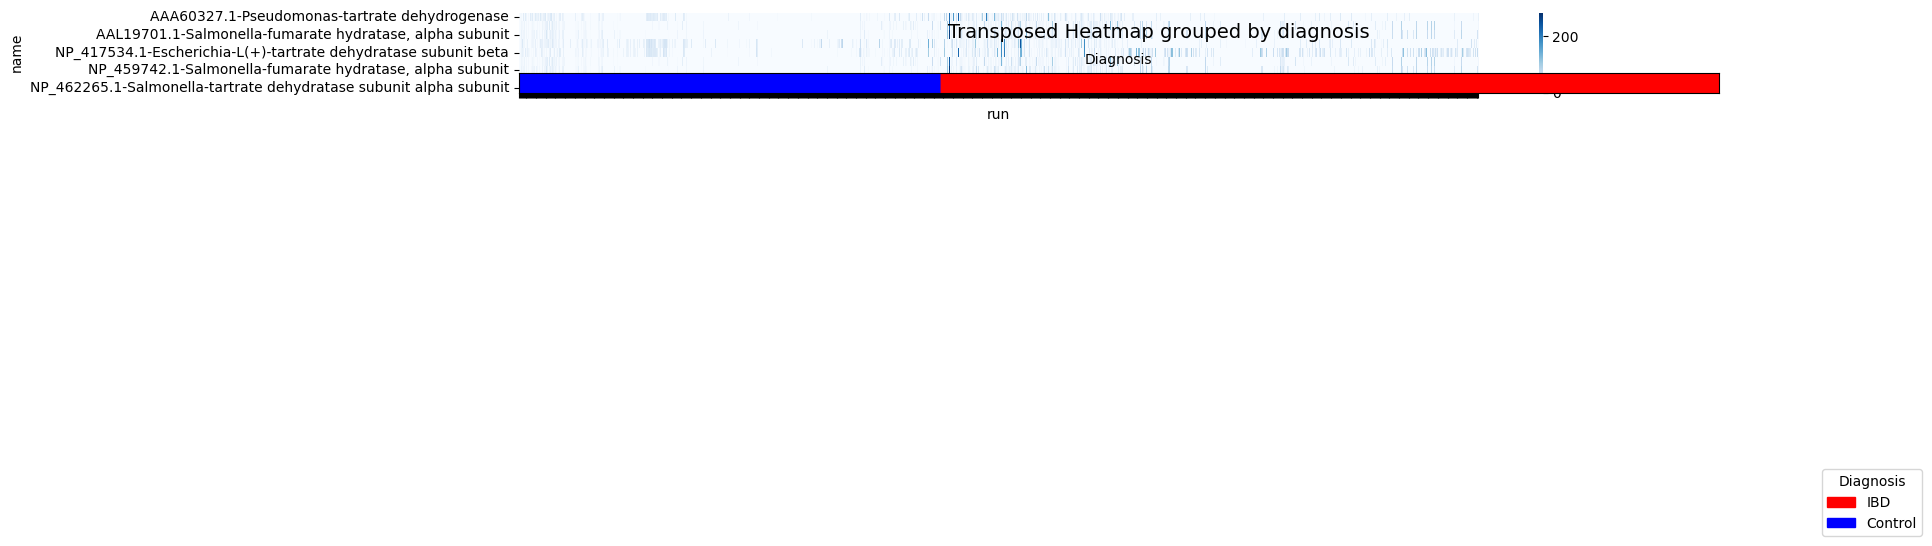